In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Load the Iris dataset
iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
logistic_reg_pred = logistic_reg.predict(X_test)
random_forest_pred = random_forest.predict(X_test)



In [4]:
# Evaluation
models = {'Logistic Regression': logistic_reg_pred,
          'Random Forest': random_forest_pred}


Model: Logistic Regression
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


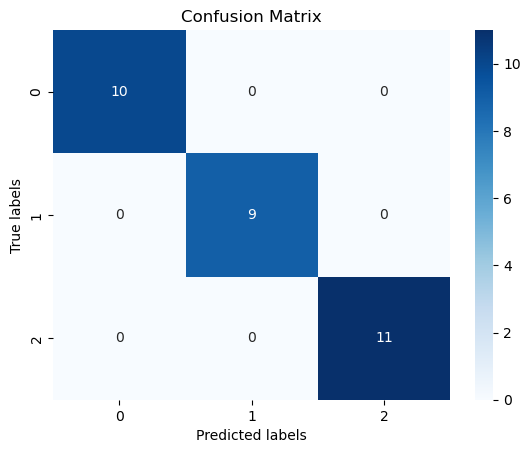

F1 Score: 1.0
Accuracy: 1.0
Precision: 1.0
Model: Random Forest
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


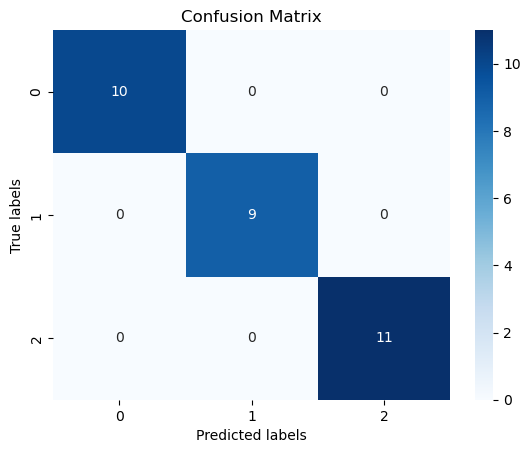

F1 Score: 1.0
Accuracy: 1.0
Precision: 1.0


In [5]:

for name, predictions in models.items():
    print("Model:", name)
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    print("F1 Score:", f1_score(y_test, predictions, average='weighted'))
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Precision:", precision_score(y_test, predictions, average='weighted'))
    print("="*50)
